# Airbnb Seattle Analysis

This is the project of Udacity's data scientist nanodegree program

## Analysis Airbnb Seattle Data By CRISP-DM Process
CRISP-DM  process(Cross-Industry Standard Process for Data Mining): is a process model describing the life cycle of data science. In short, it guides you through the entire phases of planning, organizing, and implementing your data mining project.
## CRISP-DM process majors.

1-Business Understanding

2-Data Understanding

3-Data Preparation

4-Modeling

5-Evaluation

6-Deployment

### 1-Business Understanding
An Airbnb is a residential property that hosts rent on a short term basis to travelers. It can be anything from a house, a single room, a boat or even a tree house. Think of it as pop-up accommodation – a market place where people rent out their properties.


after I understand the busness I considered three below questions to explore its way.

1-When do reservations increase in Seattle?what is the busiest season ?

2-If bookings increase is prices increase also ?

3-is the property prices change based on neighborhoods and high review scores ?

We can be able to answer these questions by analysing Airbnb dataset.


### 2-Data Understanding
We have three  Airbnb dataset:

1-Calendar, including listing id and the price and availability for that day.

2- Listings, including full descriptions and average review score.

3-Reviews, including unique id for each reviewer and detailed comments.



In [1]:

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

In [2]:
calendar = pd.read_csv('C:/Users/AlmousaRazan/Downloads/archive/calendar.csv')
listings = pd.read_csv('C:/Users/AlmousaRazan/Downloads/archive/listings.csv')
reviews = pd.read_csv('C:/Users/AlmousaRazan/Downloads/archive/reviews.csv')


### Calendar

In [3]:
calendar.columns


Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [4]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

### Data Preparation 

##### Convert price column type from object to numeric
The price values are stored as object, not integer. This is caused the value stored like $xx.xx, and it is necessary to transform this column.

In [6]:

def convert_price_to_numeric(df):
    """
Description: This function can be used to convert price column type from object to numeric.

Arguments:
    take data fram and change price column to number

Returns:
    datafram
"""
    df['price'] = df['price'].str.replace('[$,]', '',regex=True)
    df['price'] =pd.to_numeric(df['price'])
    
    return df

    
calendar =convert_price_to_numeric(calendar)



In [11]:
#convert date column to datatime type
calendar['date']=pd.to_datetime(calendar['date'])

##### Remove NA values

In [12]:
calendar_dropna = calendar.dropna(axis=0)
calendar_dub=calendar_dropna.drop_duplicates(keep = 'first')

In [13]:
calendar_dub['cnt']=1
calendar_group= calendar_dub.groupby(['date'], as_index=False)['price'].mean()

In [14]:
calendar_group2= calendar_dub.groupby(['date'], as_index=False)['cnt'].sum()


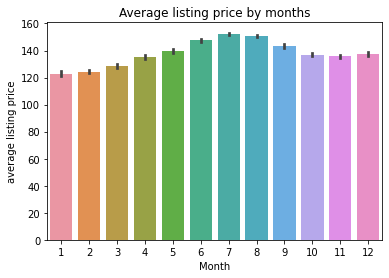

In [15]:
calendar_group.dtypes
month = calendar_group.date.dt.month.unique()

sns.barplot(x=calendar_group.date.dt.month,y=calendar_group['price']);
plt.xlabel('Month')
plt.ylabel('average listing price')
plt.title('Average listing price by months');



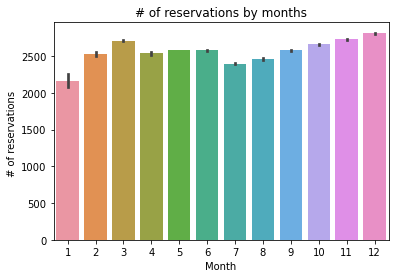

In [16]:
sns.barplot(x=calendar_group2.date.dt.month,y=calendar_group2['cnt']);
plt.xlabel('Month')
plt.ylabel('# of reservations ')
plt.title('# of reservations by months');



##### This is interesting.
From above graphs I observe 

1-The busiest seasons are on March,November and December.

2-The average price rise from June to August .

3-There is no relationship between increas number of reservations and higher prices because it is possible that real estate owners do not rent the property during the summer because they are staying there.


### Listings 

In [17]:
# listings = pd.read_csv('C:/Users/AlmousaRazan/Downloads/archive/listings.csv')

listings.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [18]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [19]:

listings =convert_price_to_numeric(listings)


In [20]:
listings_dropna = listings.dropna(axis=0)
listings2=listings[['host_neighbourhood','room_type','bedrooms','price','neighbourhood','review_scores_rating']]
listings2.dtypes

host_neighbourhood       object
room_type                object
bedrooms                float64
price                   float64
neighbourhood            object
review_scores_rating    float64
dtype: object

In [21]:
listings2['cnt'] = 1

listings2_group= listings2.groupby(['neighbourhood'], as_index=False)['price'].mean()
listings2_group= listings2_group[listings2_group['price'] > 160]
listings2_group2= listings2.groupby(['neighbourhood'], as_index=False)['review_scores_rating'].mean()
listings2_group2= listings2_group2[listings2_group2['review_scores_rating'] > 96]


<ipython-input-21-020d03d16206>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings2['cnt'] = 1


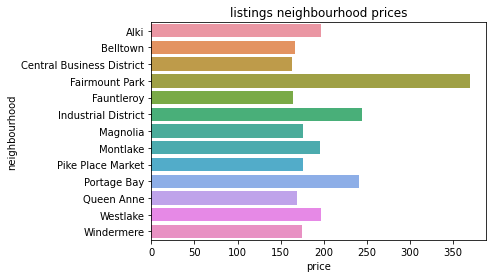

In [22]:
sns.barplot(x=listings2_group['price'],y=listings2_group['neighbourhood'],);
plt.title('listings neighbourhood prices');


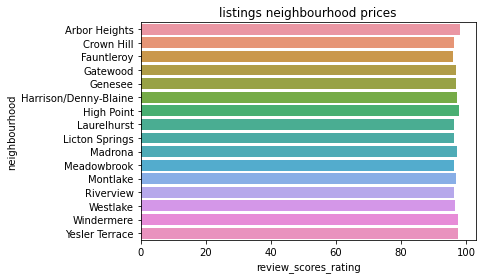

In [23]:
sns.barplot(x=listings2_group2['review_scores_rating'],y=listings2_group2['neighbourhood']);
plt.title('listings neighbourhood prices');

As you can observe from above graphs there are relation between high review scores and prices 


In [24]:
neighbourhood_analysis=listings2_group.merge(listings2_group2,how='left')
neighbourhood_analysis = neighbourhood_analysis.dropna(how = 'any')
print(neighbourhood_analysis)


   neighbourhood       price  review_scores_rating
4     Fauntleroy  164.100000             96.111111
7       Montlake  195.947368             96.812500
11      Westlake  197.000000             96.500000
12    Windermere  174.700000             97.500000


### Modeling, Evaluation


In [27]:
def ML_Model(df,y_column):
    '''
    Input:
    1-df - a dataframe holding all the variables of interest
    2- y_column -a string holding the name of the column     
    Return:
lm_model, X_train, X_test, y_train, y_test
    1-test_score : numeric - r2 score on the test data
    2-train_score : numeric - r2 score on the test data
    3-lm_model - model object from sklearn
    4-X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Arguments:
    Your function should:
    1- Drop columns with NaN for all the values
    2- Split your data into an X matrix and a response vector y
    3- Using pd.to_numeric to convert whatever strings your data might contain to numeric values.
    4- Create training and test sets of data
    5- Instantiate a LinearRegression model with normalized data
    6- Fit your model to the training data
    7- Predict the response for the training data and the test data
    8- Obtain an rsquared value for both the training and test data
    '''

    #Drop all Nan values in all columns
    '''
    here I drop all non values becuase we cann't predict numbers of rooms or bathrooms 
    all the columns are associted therefore I can't add mean or midian in these nan values
     '''
    df = df.dropna(how='all', axis=0)


    #Split data 1-explanatory 2-response variables
    X=df.drop(y_column, axis=1)
    y=df[y_column]
    X = X.apply(pd.to_numeric, errors='coerce')
    y = y.apply(pd.to_numeric, errors='coerce')
    X.fillna(0, inplace=True)
    y.fillna(0, inplace=True)
    
    
    #Split to train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)
    lm_model = LinearRegression(normalize=True) 
    lm_model.fit(X_train, y_train) 

    #Predict model
    y_test_predict = lm_model.predict(X_test)
    y_train_predict = lm_model.predict(X_train)

    #Score using your model
    
    test_sc = r2_score(y_test, y_test_predict)
    train_sc = r2_score(y_train, y_train_predict)
    return test_sc, train_sc, lm_model, X_train, X_test, y_train, y_test

test_score, train_score, lm_model, X_train, X_test, y_train, y_test= ML_Model(listings ,'price')

### Summary
This notebook uses data from the Seattle area of Airbnb and has been analyzed to answer the following questions. Here we summarize the answers to those questions.

   **1-When do reservations increase in Seattle?what is the busiest season ?**
    
        reservations increase in Seattle on March, November and December and the busiest season is on December.

   **2-If bookings increase is prices increase also ?**
    
        There is no relationship between increas number of reservations and higher prices because it is possible that real estate owners do not rent the property during the summer because they are staying there.

   **3-is the property prices change based on neighborhoods and high review scores ?**
   
        Yes , we observe from above graphs there are relation between high review scores and prices and this is the ist for The most expensive propertye with a high review scores
        
    
